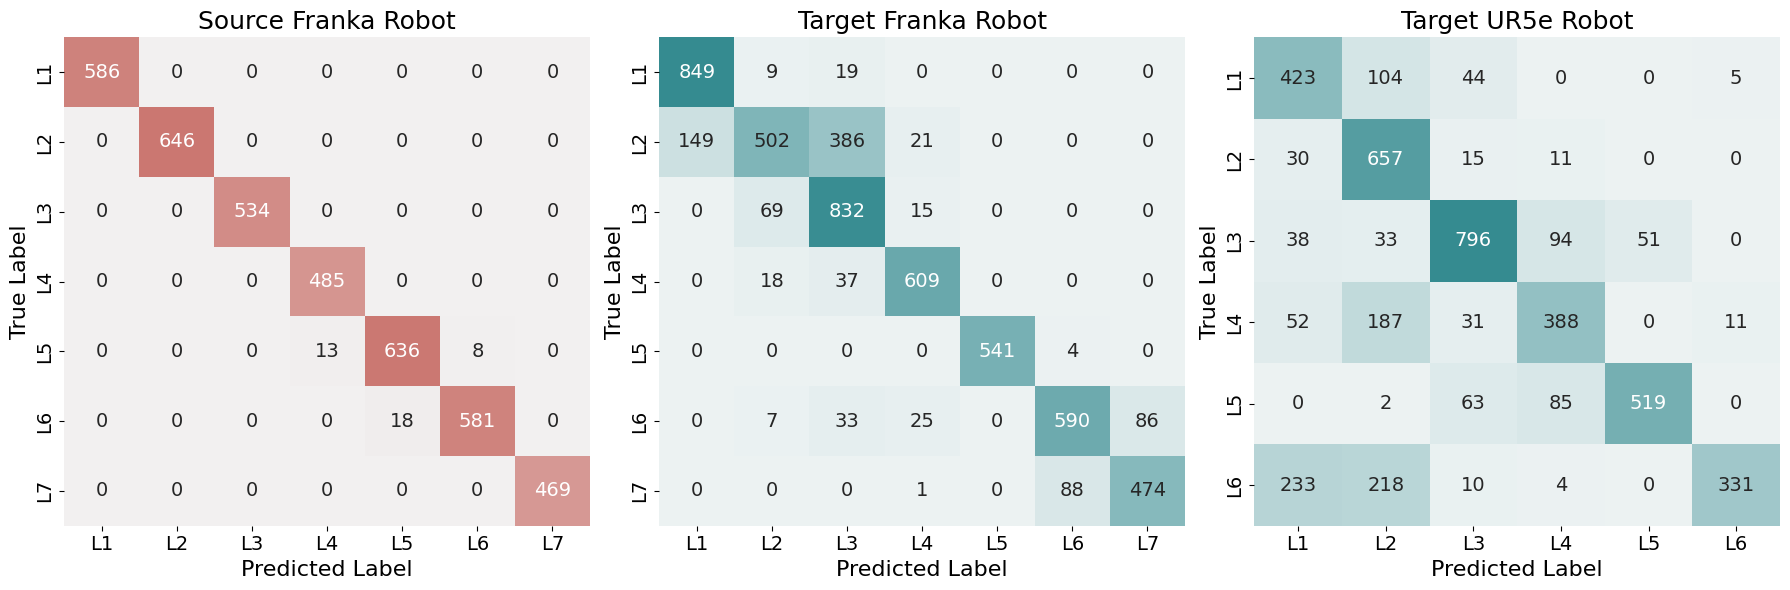

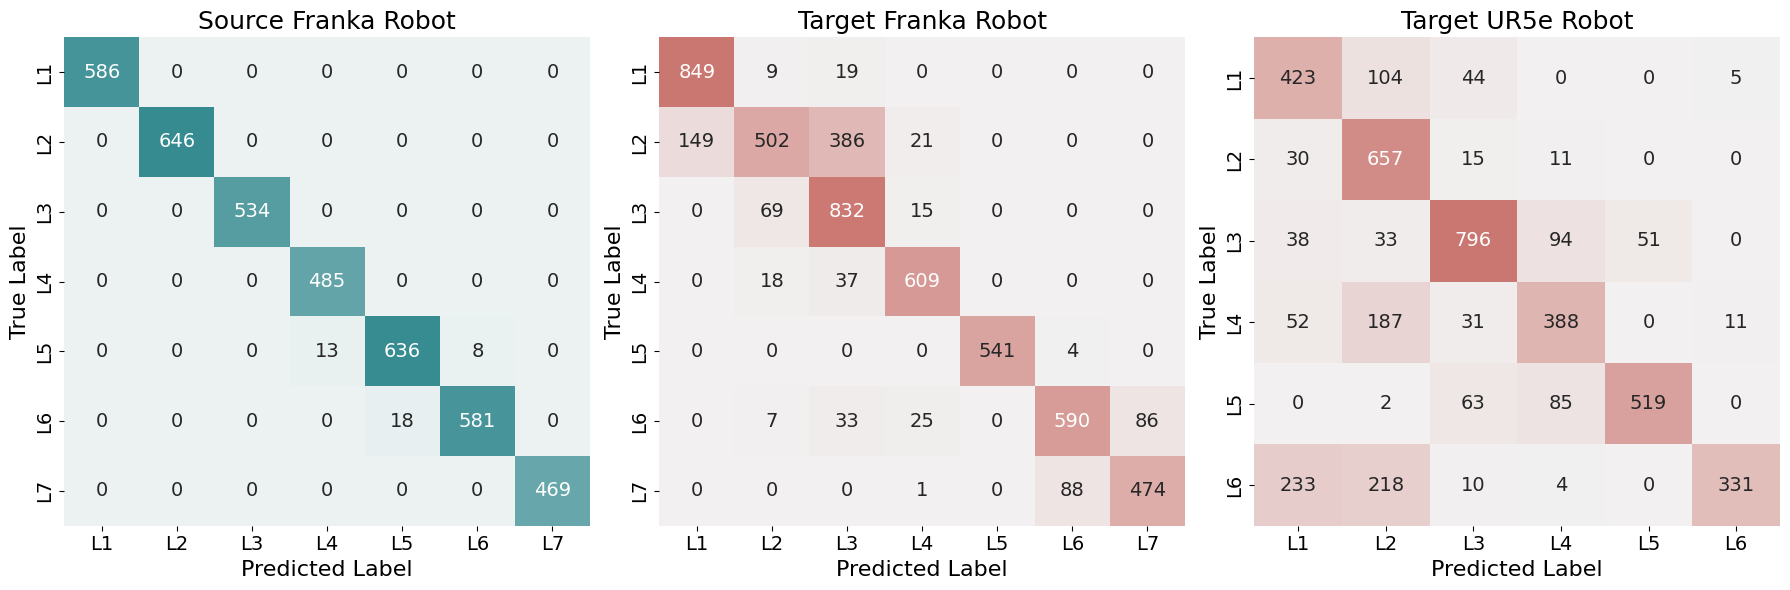

In [36]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_combined_confusion_matrices(matrices, titles, labels_all,colors,save_path):
    fig, axes = plt.subplots(1, len(matrices), figsize=(6*len(matrices), 6))
    
    # Get global min and max for color bar consistency
    vmin = min(matrix.min() for matrix in matrices)
    vmax = max(matrix.max() for matrix in matrices)
    
    for ax, matrix, title , labels , color in zip(axes, matrices, titles,labels_all, colors):
        mask = np.zeros_like(matrix, dtype=bool)
        np.fill_diagonal(mask, True)
        
        # Plot the heatmap for non-diagonal values cb7771
        sns.heatmap(matrix, annot=True, fmt='d', cmap=sns.light_palette(color, as_cmap=True), 
                    xticklabels=labels, yticklabels=labels, ax=ax,cbar=False, annot_kws={"size": 14})#, vmin=vmin, vmax=vmax)
        
        ax.set_xlabel("Predicted Label", fontsize=16)
        ax.set_ylabel("True Label", fontsize=16)
        ax.set_title(title, fontsize=18)
        ax.tick_params(axis='x', labelsize=14)
        ax.tick_params(axis='y', labelsize=14)
    
    plt.tight_layout()
    plt.savefig(save_path, format="pdf", dpi=600)
    plt.show()
# Define the confusion matrices
source_franka = np.array([
    [586,   0,   0,   0,   0,   0,   0],
    [  0, 646,   0,   0,   0,   0,   0],
    [  0,   0, 534,   0,   0,   0,   0],
    [  0,   0,   0, 485,   0,   0,   0],
    [  0,   0,   0,  13, 636,   8,   0],
    [  0,   0,   0,   0,  18, 581,   0],
    [  0,   0,   0,   0,   0,   0, 469]
])

target_franka = np.array([
    [849,   9,  19,   0,   0,   0,   0],
    [149, 502, 386,  21,   0,   0,   0],
    [  0,  69, 832,  15,   0,   0,   0],
    [  0,  18,  37, 609,   0,   0,   0],
    [  0,   0,   0,   0, 541,   4,   0],
    [  0,   7,  33,  25,   0, 590,  86],
    [  0,   0,   0,   1,   0,  88, 474]
])

target_ur5e = np.array([
    [423, 104,  44,   0,   0,   5],
    [ 30, 657,  15,  11,   0,   0],
    [ 38,  33, 796,  94,  51,   0],
    [ 52, 187,  31, 388,   0,  11],
    [  0,   2,  63,  85, 519,   0],
    [233, 218,  10,   4,   0, 331]
])

# Define labels and titles
labels_franka = ["L1", "L2", "L3", "L4", "L5", "L6", "L7"]
labels_ur5e = ["L1", "L2", "L3", "L4", "L5", "L6"]
titles = ["Source Franka Robot", "Target Franka Robot", "Target UR5e Robot"]
save_path = os.path.expanduser("~/Desktop/confusion_matrices.pdf")
colors = ["#cb7771","#358b90", "#358b90"]
# Plot combined heatmap
plot_combined_confusion_matrices([source_franka, target_franka, target_ur5e], titles, [labels_franka,labels_franka,labels_ur5e], colors, save_path)
colors = ["#358b90","#cb7771", "#cb7771"]
plot_combined_confusion_matrices([source_franka, target_franka, target_ur5e], titles, [labels_franka,labels_franka,labels_ur5e], colors, save_path)


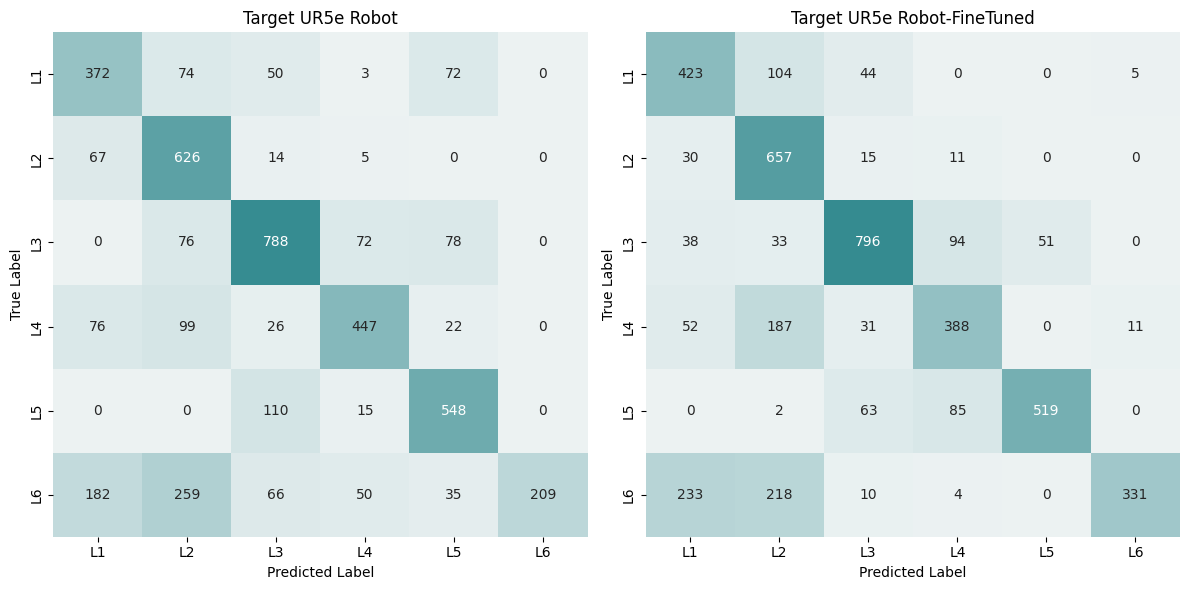

In [59]:
target_ur5e_0 =np.array(   [[372,  74 , 50  , 3  ,72  , 0],
                            [ 67, 626 , 14  , 5  , 0  , 0],
                            [  0 , 76 ,788  ,72  ,78  , 0],
                            [ 76 , 99  ,26 ,447  ,22  , 0],
                            [  0 ,  0 ,110  ,15 ,548  , 0],
                            [182 ,259  ,66  ,50  ,35 ,209]])

# Define labels and titles
labels_ur5e = ["L1", "L2", "L3", "L4", "L5", "L6"]
titles = ["Target UR5e Robot", "Target UR5e Robot-FineTuned"]

# Plot combined heatmap
plot_combined_confusion_matrices([ target_ur5e_0, target_ur5e], titles, [labels_ur5e, labels_ur5e])